# About this notebook 

#### Feature: Breed

This is one of a series of notebooks (one for each feature of interest) that explores the feature for missing data, data characteristics, correlation with the rate of adoption (predictor variable) and other points of interest that might be helpful to know (and deal with) prior to machine learning.

<div class="span5 alert alert-success">
<p> <I> Feature Description: </I> The "Breed" data consists of two columns (Breed 1 and Breed 2).  Breed 1 is the primary breed and Breed 2 is populated when the pet is a mixed breed.  There are 306 breed types of which 241 represent dogs and 66 represent cats.   
           <br> 
    <I> Source: </I> https://www.kaggle.com/c/petfinder-adoption-prediction/data  </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Predictor (Adoption Speed) Description: </I> 

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.   
<br> 
The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.    
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.    
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.    
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.    
4 - No adoption after 100 days of being listed.    

</p>
</div>

In [154]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [155]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
#Import the csv file
dfi = pd.read_csv('train.csv')
dfi.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3,3


In [157]:
#Import the breed file
dfb = pd.read_csv('breed_labels.csv')
dfb.head(1)

,BreedID,Type,BreedName
0,1,1,Affenpinscher


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>  </p>
</div>

In [158]:
#Create Breed Dataframe

dfa = dfi[['Type','Breed1','Breed2','AdoptionSpeed']]
dfa.columns = ['type','breed1','breed2','adoptionspeed']


In [159]:
# Percentage of missing values in each column of training data
pd.DataFrame(
    dfa.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,type,breed1,breed2,adoptionspeed
% Missing Values,0.0,0.0,0.0,0.0


In [160]:
# Percentage of missing values in each column of breeding_labels data
pd.DataFrame(
    dfb.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,BreedID,Type,BreedName
% Missing Values,0.0,0.0,0.0


<div class="span5 alert alert-info">
<p> <B>  Characteristics of the data: </B>  </p>
</div>

In [161]:
#Dogs dataframe
dfdogs = dfa[dfa.type == 1]

In [162]:
#Average adoption speed for a dog
dogsavgadoptionspeed = round(dfdogs.adoptionspeed.sum()/dfdogs.type.count(),2)
print('Dogs average adoption speed: ' + str(dogsavgadoptionspeed))


Dogs average adoption speed: 2.62


In [163]:
#Calculate the average adoption speed per breed for dogs.  Then compare this to overall avg for dogs to identify any breeds that
#are significantly higher or lower than the average.  

dfdbg = dfdogs[['breed1','adoptionspeed']]
dfdbg.columns = ['breedid','adoptionspeed']

dfdbg = dfdbg[['breedid','adoptionspeed']].groupby(['breedid']).agg(['count', 'mean'])
dfdbg = dfdbg.reset_index()

dfdbg.columns = ['breedid','breedidcount','breedadoptionspeedmean']

dfdbg['avgdogadoptionspeed'] = dogsavgadoptionspeed
dfdbg['adoptionspeeddifference'] = dfdbg.breedadoptionspeedmean - dfdbg.avgdogadoptionspeed

dfdbg = dfdbg.sort_values('breedidcount',ascending=False)

dfdbg2 = dfdbg[dfdbg.breedidcount > 30]
dfdbg2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 115 to 26
Data columns (total 5 columns):
breedid                    18 non-null int64
breedidcount               18 non-null int64
breedadoptionspeedmean     18 non-null float64
avgdogadoptionspeed        18 non-null float64
adoptionspeeddifference    18 non-null float64
dtypes: float64(3), int64(2)
memory usage: 864.0 bytes


In [164]:
#Cats dataframe
dfcats = dfa[dfa.type == 2]

In [165]:
#Average adoption speed for a cat
dfcats = dfa[dfa.type == 2]

catsavgadoptionspeed = round(dfcats.adoptionspeed.sum()/dfcats.type.count(),2)
print('Cats average adoption speed: ' + str(catsavgadoptionspeed))


Cats average adoption speed: 2.4


In [166]:
#Calculate the average adoption speed per breed for cats.  Then compare this to overall avg for cats to identify any breeds that
#are significantly higher or lower than the average.  

dfcbg = dfcats[['breed1','adoptionspeed']]
dfcbg.columns = ['breedid','adoptionspeed']

dfcbg = dfcbg[['breedid','adoptionspeed']].groupby(['breedid']).agg(['count', 'mean'])
dfcbg = dfcbg.reset_index()

dfcbg.columns = ['breedid','breedidcount','breedadoptionspeedmean']

dfcbg['avgcatadoptionspeed'] = catsavgadoptionspeed
dfcbg['adoptionspeeddifference'] = dfcbg.breedadoptionspeedmean - dfcbg.avgcatadoptionspeed

dfcbg = dfcbg.sort_values('breedidcount',ascending=False)

dfcbg2 = dfcbg[dfcbg.breedidcount > 30]

In [167]:
#Breed Function
def petbreed(breedid):
    
    breedname = ''
    for i,r in dfb.iterrows():
        if r['BreedID'] == breedid:
            breedname = r['BreedName']
    
    return breedname

In [168]:
mylist = []

for i, r in dfcbg2.iterrows():
    mylist.append(petbreed(r['breedid']))
    
dfcbg2['breedname'] = mylist
dfcbg2.head(1)

,breedid,breedidcount,breedadoptionspeedmean,avgcatadoptionspeed,adoptionspeeddifference,breedname
29,266,3634,2.479086,2.4,0.079086,Dom Short Hair


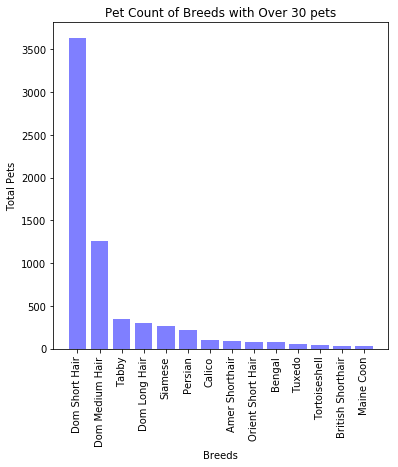

In [173]:
#Bar plot of breed counts
plt.bar(dfcbg2.breedname, dfcbg2.breedidcount, color='b', align='center', alpha=0.5)
plt.ylabel('Total Pets')
plt.xlabel('Breeds')
plt.xticks(rotation='vertical')
plt.title('Pet Count of Breeds with Over 30 pets')
plt.rcParams["figure.figsize"] = [9,9]
plt.show()

<div class="span5 alert alert-info">
<p> <B>  Correlation with the Adoption Rate: </B>  </p>
</div>

In [170]:
#Create a dataframe to calculate correlation
dfaa = dfi[['Breed1','AdoptionSpeed']]
dfaa.columns = ['breed1','adoptionspeed']

In [171]:
#Calculate pearson correlation between pet breed and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfaa.breed1,dfaa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,2)*100) + '%')

Correlation value: 11.0%


<div class="span5 alert alert-info">
<p> <B>  Other Points of Interest: </B>  </p>
</div>